<a href="https://colab.research.google.com/github/aniketmondal1210/CodePlayground/blob/main/DeepfakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow opencv-python matplotlib transformers

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniket21destiny","key":"d58c17a2c3dd56de31b45a41dfa5b7fb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the data data from the Kaggle
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces
!unzip -q 140k-real-and-fake-faces.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.75G/3.75G [00:46<00:00, 129MB/s]
100% 3.75G/3.75G [00:46<00:00, 87.4MB/s]


In [ ]:
#Deal with the data
base_path = "data/real_vs_fake/real-vs-fake/"
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")
valid_path = os.path.join(base_path, "valid")

In [ ]:
print("Training real images: ", len(os.listdir(os.path.join(train_path, "real"))))
print("Training fake images: ", len(os.listdir(os.path.join(train_path, "fake"))))
print("Testing real images: ", len(os.listdir(os.path.join(test_path, "real"))))
print("Testing fake images: ", len(os.listdir(os.path.join(test_path, "fake"))))

Training real images:  50000
Training fake images:  50000
Testing real images:  10000
Testing fake images:  10000


In [ ]:
#Selection of pre-trained model for deep fake detection
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Building the model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),

])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 100000 images belonging to 2 classes.


In [ ]:
valid_gen = datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.


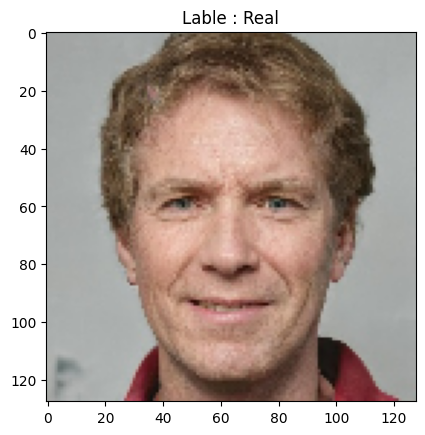

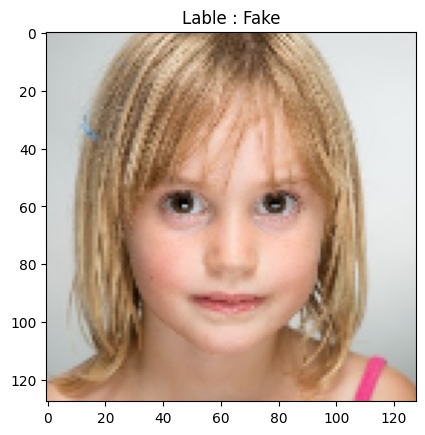

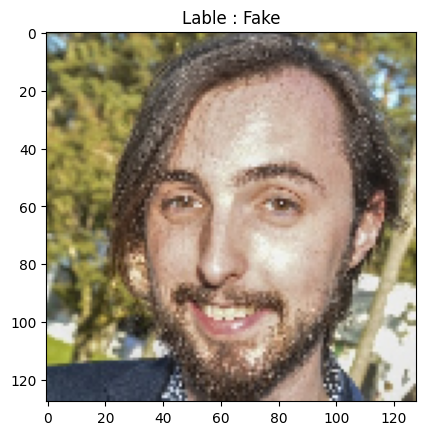

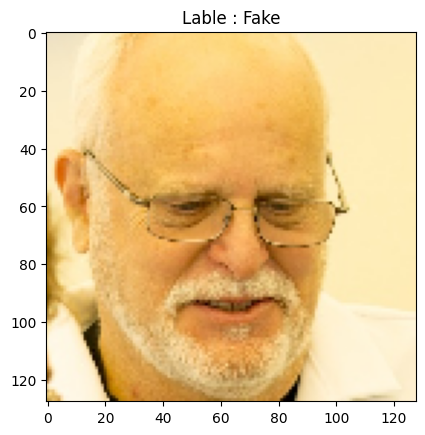

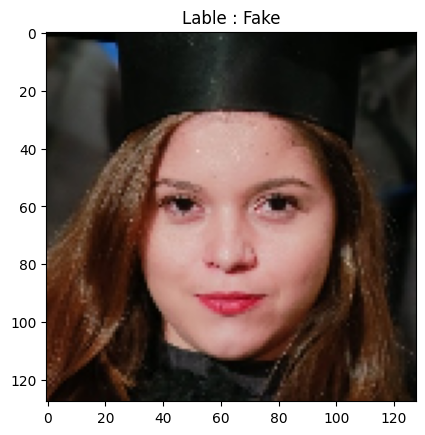

In [ ]:
for images, labels in train_generator:
    for i in range(5):
      plt.imshow(images[i])
      plt.title(f"Lable : { 'Real' if labels[i]==0 else 'Fake'}")
      plt.show()

    break

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_gen,
    epochs=5,
    steps_per_epoch = train_generator.samples // 32,
    validation_steps = valid_gen.samples // 32
)

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2824s 904ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3005s 951ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2976s 952ms/step - accuracy: 0.5064 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
#Test my model ! .. Pass an image and ask, boss is it real or fake ? -- Check the accuracy